(-0.1, 1.1)

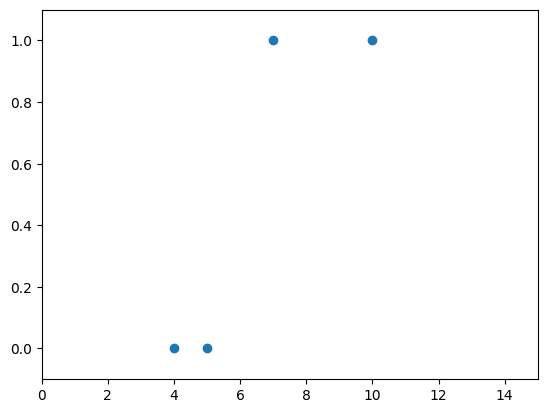

In [2]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.array([10, 7, 5, 4])
result = np.array([1, 1, 0, 0])

plt.scatter(hours, result)
plt.xlim(0, 15)
plt.ylim(-0.1, 1.1)

In [3]:
def LinR(x, w=2, b=-10):
    return w * x + b

print(LinR(hours))

[10  4  0 -2]


In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def LogR(x, w=2, b=-10):
    z = LinR(x, w=w, b=b)
    h_z = sigmoid(z)
    return h_z

print(LogR(hours))

# 예측값 : 1, 1, 1, 0
# 실제값 : 1, 1, 0, 0

[0.9999546  0.98201379 0.5        0.11920292]


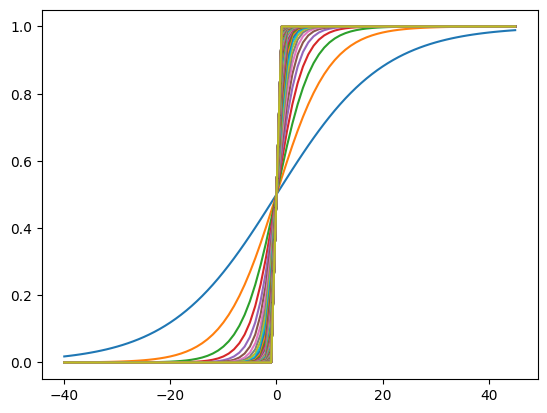

In [5]:
for i in range(1,100,1):
    w = i/10
    b = 0
    x = np.arange(-40,46,1)
    h_z = LogR(x, w=w, b=b)
    plt.plot(x, h_z)

plt.show()

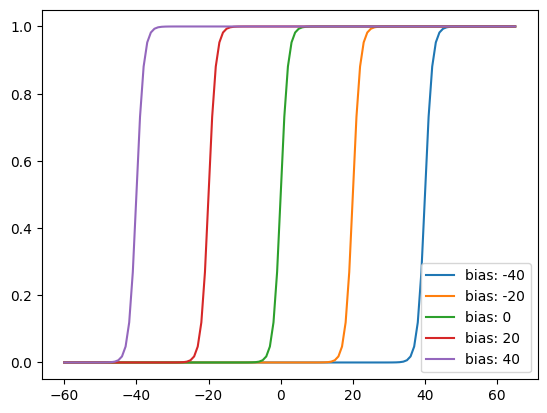

In [6]:
for i in range(-40, 41, 20):
    w = 1
    b = i
    x = np.arange(-60,66,1)
    h_z = LogR(x, w=w, b=b)
    plt.plot(x, h_z, label='bias: '+str(b))
plt.legend()
plt.show()

# bias값이 증가할 수록 왼쪽으로 이동

In [7]:
hours = np.array([10, 7, 5, 4])
result = np.array([1, 1, 0, 0])

def LinR(x, w=2, b=-10):
    return w * x + b

def sigmoid(z):
    return 1/(1+np.exp(-z))

def LogR(x, w=2, b=-10):
    z = LinR(x, w=w, b=b)
    h_z = sigmoid(z)
    return h_z

In [8]:
class LR():
    def __init__(self, w=2, b=-10):
        self.w = w
        self.b = b

    def LinR(self, x):
        return self.w * x + self.b

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def LogR(self, x):
        z = self.LinR(x)
        h_z = self.sigmoid(z)
        return h_z

model = LR()

print(model.LogR(hours))

[0.9999546  0.98201379 0.5        0.11920292]


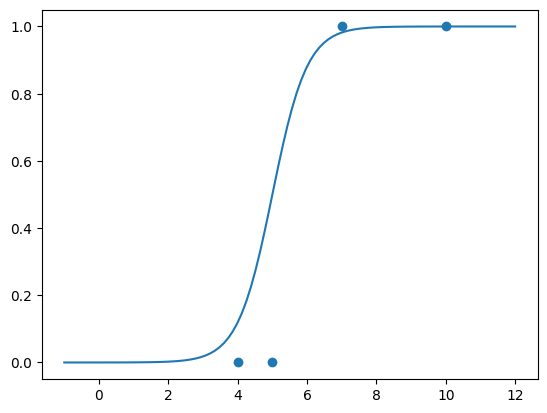

In [9]:
x = np.linspace(-1, 12, 100)
pred = model.LogR(x)
plt.plot(x, pred)
plt.scatter(hours, result)

In [10]:
pred = model.LogR(hours)
print(pred)
pred[pred>=0.5]= 1.0; pred[pred<0.5]=0.0
print(pred)

[0.9999546  0.98201379 0.5        0.11920292]
[1. 1. 1. 0.]


In [19]:
def cost_function(h,y):
    return -(y*np.log(h)+(1-y)*np.log(1-h))

pred = model.LogR(hours)
print(cost_function(pred, np.mean(result)))

[0.00147867 0.19330551 0.15751283 0.03202054]


In [12]:
print(f'Gradient: {pred - result}')
print(f'Mean : {np.mean(pred - result)}')

lr = 2.0
w=2; b=-10

new_b = b - lr*np.mean(pred - result)
print(f'new bias : {new_b}') 

Gradient: [-4.53978687e-05 -1.79862100e-02  5.00000000e-01  1.19202922e-01]
Mean : 0.1502928285478309
new bias : -10.300585657095661


In [13]:
print(f'old model: {LogR(hours)}')
print(f'new model: {LogR(hours, b=-10.3)}')

old model: [0.9999546  0.98201379 0.5        0.11920292]
new model: [0.99993872 0.97587298 0.42555748 0.09112296]


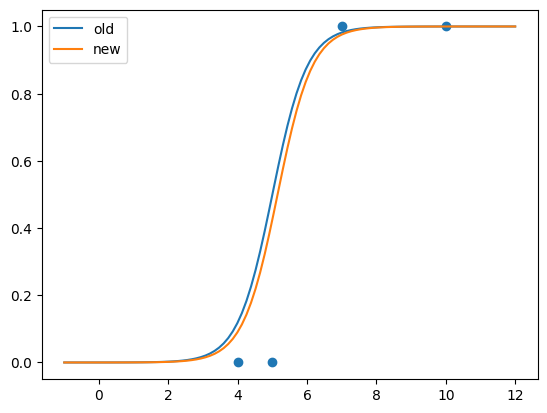

In [14]:
x = np.linspace(-1, 12, 100)

model.b = -10.0
pred = model.LogR(x)
plt.plot(x, pred, label='old')

model.b = -10.3
pred = model.LogR(x)
plt.plot(x, pred, label='new')

plt.scatter(hours, result)

plt.legend()

In [15]:
class LR():
    def __init__(self, w=2, b=-10, lr=0.01):
        self.w = w
        self.b = b
        self.lr = lr

    def LinR(self, x):
        return self.w * x + self.b

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def LogR(self, x):
        z = self.LinR(x)
        h_z = self.sigmoid(z)
        return h_z

    def fit(self, x, y, epochs=1000):
        for epoch in range(epochs):
            pred = self.LogR(x)
            self.w = np.mean(self.w - self.lr*np.mean(pred-y)*x)
            self.b = np.mean(self.b - self.lr*np.mean(pred-y))

model = LR()

model.fit(hours, result)

print(f'weight: {model.w}')
print(f'bias: {model.b}')

weight: 1.6568662766922844
bias: -10.052789803585782


pred: [1. 1. 0. 0.]


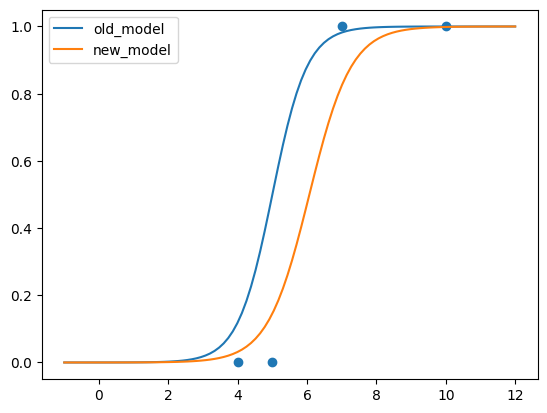

In [16]:
x = np.linspace(-1, 12, 100)

old_model = LR()
pred = old_model.LogR(x)
plt.plot(x, pred, label='old_model')

pred = model.LogR(x)
plt.plot(x, pred, label='new_model')
plt.legend()

plt.scatter(hours, result)

pred = model.LogR(hours)
pred[pred>=0.5]= 1.0; pred[pred<0.5]=0.0
print(f'pred: {pred}')